---
# **Logistic Regression**
---

**1.** [**Introduction**](#Section1)<br>

**2.** [**More on Logistic Regression**](#Section2)<br>
  - **2.1** [**What is wrong with Linear Regression for Classification ?**](#Section21)
  - **2.2** [**Theory**](#Section22)
  - **2.3** [**Interpretation**](#Section23)
      - **2.3.1** [**Odds And Log odds (What? and Why?)**](#Section231)
      - **2.3.2** [**Logistic Regression and Log Odds**](#Section232)

**3.** [**Multiple Linear Regression**](#Section3)<br>

**4.** [**Model Evaluation**](#Section4)<br>
  - **4.1** [**Root Mean Square Error**](#Section41)
  - **4.1** [**R-Squared Statistics (Coefficient of Determination)**](#Section42)

**5.** [**Regression Assumptions**](#Section5)<br>

**6.** [**Case Study - Car Sales problem**](#Section6)<br>
  - **6.1** [**Problem Statement**](#Section61)
  - **6.2** [**Importing libraries**](#Section62)
  - **6.3** [**Data Acquisition and Description**](#Section63)
  - **6.4** [**Data pre-profiling**](#Section64)
  - **6.5** [**Data pre-processing**](#Section65)
  - **6.6** [**Data post-profiling**](#Section66)
  - **6.7** [**Exploratory Data Analysis**](#Section67)  
  - **6.8** [**Feature extraction for regression**](#Section68)  
  - **6.9** [**Feature Transformation**](#Section69)  
  - **6.10** [**Feature Scaling**](#Section610)  
  - **6.11** [**Model Training and Evaluation**](#Section611)  
  

<a name = Section1></a>
# **1. Introduction**

- **Logistic Regression** is a classification algorithm used when the target variable is discreet or categorical.
- This technique forms relationship between features and computes probability of the categorical outcome to make decisions.

<a name = Section2></a>
# **2 More Logistic Regression**

<a name = Section21></a>
## **2.1 <u>What is wrong with Linear Regression for Classification ?</u>**
   
   - The linear regression model can work well for regression, but fails for classification. Why is that? In case of two classes, you could label one of the classes with 0 and the other with 1 and use linear regression. Technically it works and most linear model programs will spit out weights for you. But there are a few problems with this approach:  
       <br>
   
       - A linear model does not output probabilities, but it treats the classes as numbers (0 and 1) and fits the best hyperplane (for a single feature, it is a line) that minimizes the distances between the points and the hyperplane. So it simply interpolates between the points, and you cannot interpret it as probabilities.
       
       <br>
       
       - Since the predicted outcome is not a probability, but a linear interpolation between points, there is no meaningful threshold at which you can distinguish one class from the other.
       
       <br>
       
       - The image below shows application of Linear Regression model for classification of cancer tumor (malignant (1) or not malignant(0)). For distribution on the left, a threshold of 0.5 seems to work but after just adding a few more data points of malignant tumor, the threshold of 0.5 doesn't seem to work.
       
       <img src='images/linear-class-threshold-1.png' width='500' height='400' >
       
       <br>
       
       - Linear models do not extend to classification problems with multiple classes. You would have to start labeling the next class with 2, then 3, and so on. The classes might not have any meaningful order, but the linear model would force a weird structure on the relationship between the features and your class predictions. The higher the value of a feature with a positive weight, the more it contributes to the prediction of a class with a higher number, even if classes that happen to get a similar number are not closer than other classes. 
   

<a name = Section22></a>
## **2.2 <u>Theory</u>**

   - A solution for classification problem is **Logistic Regression**. Instead of fitting a straight line or a hyperplane, the **Logisitic Regression** model uses the logistic function (sigmoid) to sequeeze the output of a linear equation between 0 and 1.

   $$
   S(x) = \dfrac{1}{1+e^{-x}} ; x \in (-\infty, \infty)
   $$


   $$
   \lim_{x \to -\infty} S(x) = \lim_{x \to -\infty} \dfrac{1}{1+e^{-x}} = 0 
   $$


   $$
   \lim_{x \to \infty} S(x) = \lim_{x \to \infty} \dfrac{1}{1+e^{-x}} = 1 
   $$

       Hence,

   $$
   S(x) \in (0, 1)
   $$

   - The sigmoid function is a probabilistic function that lies in $(0, 1)$
       
   - The step from linear regression to logistic regression is kind of straightforward. For the ith observation or data point we have
   
   Linear Regression, <br>
   $$
   \hat y^{(i)} = \beta_0 + \beta_1x_1^{(i)} + \beta_2x_2^{(i)} + ..... + \beta_px_p^{(i)}
   $$
   
   Logistic Regression,
   $$
   P(\hat y^{(i)} = 1 \ | \ (x_1^{(i)}, x_2^{(i)}, ....) ) = S(\hat y^{(i)}) = \dfrac{1}{1 + e^{-(\beta_0 + \beta_1x_1^{(i)} + \beta_2x_2^{(i)} + ..... + \beta_px_p^{(i)})}} 
   $$
   
   
   - Applying the Logistic Regression model to the above tumor example. We can now use a threshold of 0.5 in both cases
   
   <img src='images/logistic-class-threshold-1.png' width='500' height='400' >
 

<a name = Section23></a>
## **2.3 <u>Interpretation</u>**   

<a name = Section231></a>
### **2.3.1 <u>Odds And Log odds (What? and Why?)</u>**

Let's consider an example, where we play a game of chess with an AI bot. We played 10 games in total, where we managed to win 4 games and lost the other 6 games.

   - The odds of winning with the AI bot are 4 to 6 i.e. out of a total of 10 games, we won 4 games and lost 6 games. The probability of winning would be different. Hence, 
   
   $$
   Odds = \dfrac{4}{6}
   $$
   
   $$
   probability \ of \ winning = \dfrac{4}{10}
   $$
   
   $$
   probability \ of \ losing = \dfrac{6}{10}
   $$
   
   - We can also compute odds given the probability as.
   
   $$
   Odds \ of \ winning = \dfrac{probability \ of \ winning}{probability \ of \ losing} = \dfrac{\dfrac{4}{10}}{\dfrac{6}{10}} = \dfrac{4}{6}
   $$
   
   - Now let's say we increase the number of games played between us and the AI bot to 100, 500, 1000 ... while keeping the number of games won by us as 4.
   
   $$
   Odds \ of \ winning = \dfrac{4}{6} = 0.6667
   $$
   
   $$
   Odds \ of \ winning = \dfrac{4}{96} = 0.04167
   $$
   
   $$
   Odds \ of \ winning = \dfrac{4}{496} = 0.0080645
   $$
   
   $$
   Odds \ of \ winning = \dfrac{4}{996} = 0.004016
   $$
   
   $$ \vdots $$
   
   $$
   Odds \ of \ winning = \lim_{n \to \infty} \dfrac{4}{n - 4} \approx 0 ; n \ is \ total \ no \ of \ games
   $$
   
   
   - Basically, the worse we play our odds of winning keep getting close to 0. Since we are losing more and more, this can also be called **odds against winning**. We can conclude that odds against winning stay between,
   
   $$
    Odds \ against \ winning \in (0 \ , \ 0.6667]
   $$
   
   <br>
   
   - Similarly, if we keep playing better and keep winning against the AI bot. Let's say we increase the number of games to 100, 500, 1000 such that the AI bot only manages to win 6 games each time (although hard to believe). Then,
   $$
   Odds \ of \ winning = \dfrac{4}{6} = 0.6667
   $$
   
   $$
   Odds \ of \ winning = \dfrac{94}{6} = 15.67
   $$
   
   $$
   Odds \ of \ winning = \dfrac{494}{6} = 82.33
   $$
   
   $$
   Odds \ of \ winning = \dfrac{994}{6} = 165.67
   $$
   
   $$
   \vdots
   $$
   
   $$
   Odds \ of \ winning = \lim_{n \to \infty} \dfrac{n-6}{6} \approx \infty ; n \ is \ total \ no \ of \ games
   $$
   
   - As in this case we are winning, we can term this odds as **odds in favor of winning**, which are quickly increasing as our performance gets better. Thus odds in favor of winning range between
   
   $$
    Odds \ in \ favor \ of \ winning \in [0.6667 \ , \ \infty)
   $$
   
   <br>
   
   - The plot below shall make things clear. You can simulate this plot yourself by running the code cell below.
   
   <img src='images/logodds_vs_odds.png' width='1000' height='400' >
   
   
   
   - In our scenario, we can see that the odds against us winning range from 0 to 0.6667 whereas odds in favor of us winning range from 0.6667 to infinity, which is a very large scale. This makes the magnitude of odds against look so much smaller to those in favor. **To balance the scale we use log of the odds**. The log of odds function is called Logits function.
   
   $$
   \text{Logit} \ \text{Function} = \log(odds) = \log(\dfrac{p}{1-p})
   $$

<a name = Section232></a>
### **2.3.2 <u>Logistic Regression and Log Odds</u>**

   - As discussed in the previous section, we now know what the Logit function (log odds) is. Let's apply it to our model equation of Logistic Regression.
   
       $$
       \text{Logit} \ \text{Function} = \log(odds) = \log(\dfrac{P(\hat y^{(i)} = 1 \ | \ (x_1^{(i)}, x_2^{(i)}, ....) )}{1-P(\hat y^{(i)} = 1 \ | \ (x_1^{(i)}, x_2^{(i)}, ....) )}) 
       = \log(\dfrac{P(\hat y^{(i)} = 1 \ | X^{(i)})}{1 - P(\hat y^{(i)} = 1 \ | X^{(i)})}
       $$
       
       $$
       \log(\dfrac{P(\hat y^{(i)} = 1 \ | X^{(i)})}{1 - P(\hat y^{(i)} = 1 \ | X^{(i)})}) 
       = \log( \dfrac{S(y^{(i)})}{1 - S(y^{(i)})} )
       = \log( \dfrac{\dfrac{1}{1 + e^{-(\beta_0 + \beta_1x_1^{(i)} + \beta_2x_2^{(i)} + ..... + \beta_px_p^{(i)})}} }{1 - \dfrac{1}{1 + e^{-(\beta_0 + \beta_1x_1^{(i)} + \beta_2x_2^{(i)} + ..... + \beta_px_p^{(i)})}} } )
       = \log( e^{(\beta_0 + \beta_1x_1^{(i)} + \beta_2x_2^{(i)} + ..... + \beta_px_p^{(i)})} )
       $$
       
       $
       \ \ \ \text{Hence,}
       $
       
       $$
       \log(\dfrac{P(\hat y^{(i)} = 1 \ | X^{(i)})}{1 - P(\hat y^{(i)} = 1 \ | X^{(i)})}) 
       = \beta_0 + \beta_1x_1^{(i)} + \beta_2x_2^{(i)} + ..... + \beta_px_p^{(i)}
       $$
       
       <br>
       
       - we can interpret the above equation as (similarly we did in Liner Regression) : Keeping the other coefficients constant, if we increase the coefficient $\beta_2$ (let'say) then the chances (log odds) of winning (i.e. getting $\hat y =1$) increases linearly since log odds has a linear relationship with the coefficients. Another interpretation of this can be: (we will consider $\beta_2$ as the changing parameter)

       $$
       \text{odds}_{\beta_2}
       = e ^ { \beta_0 + \beta_1x_1^{(i)} + \beta_2x_2^{(i)} + ..... + \beta_px_p^{(i)} }
       $$

       $$
       \text{odds}_{2 * \beta_2}
       = e ^ { \beta_0 + \beta_1x_1^{(i)} + 2 * \beta_2x_2^{(i)} + ..... + \beta_px_p^{(i)} }
       $$

       $$
       \dfrac{\text{odds}_{2  \beta_2}}{\text{odds}_{\beta_2}}
       = e ^ {\beta_2x_2^{(i)}}
       $$

       <br>
   
       - Thus we can say that, to more precise, if we double the coefficient $\beta_2$ keeping all others constant then the odds of winning increases by a factor of $e ^ {\beta_2x_2^{(i)}}$

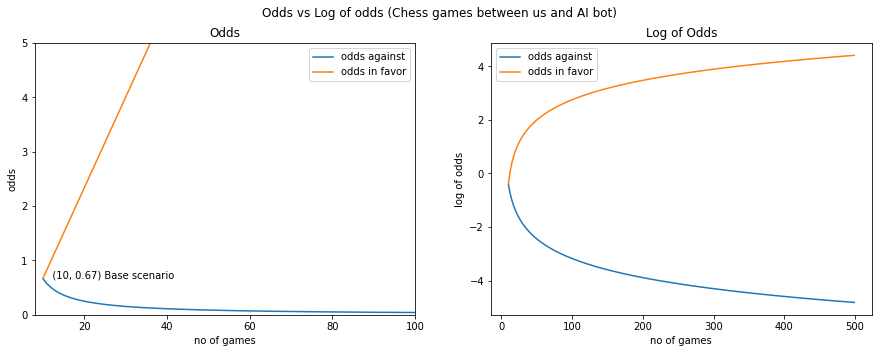

In [92]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

def odds_vs_logodds(w_us, total_games): # wins vs total_games
    
    w_AI = total_games - w_us # wins by AI

    fig, ax = plt.subplots(1,2, figsize=(15,5))
    
    plt.suptitle('Odds vs Log of odds (Chess games between us and AI bot)')

    ### plotting the change in odds as we increase the no of games
    n = np.arange(10,500)

    wins = w_us
    wins_AI = n - wins

    ax[0].plot(n ,wins/wins_AI, label='odds against')

    wins_AI = w_AI
    wins = n - wins_AI

    ax[0].plot(n ,wins/wins_AI, label='odds in favor')
    ax[0].legend()
    ax[0].set_xlabel('no of games')
    ax[0].set_ylabel('odds')
    ax[0].set_title('Odds')
    ax[0].set_xlim([8, 100])
    ax[0].set_ylim([0, 5])
    ax[0].annotate('   ({}, {}) Base scenario'.format(total_games, np.round(w_us/w_AI,2)), xy=(total_games, w_us/w_AI))
    
    
    
    ### plotting the change in log of odds as we increase the no of games
    n = np.arange(10,500)

    wins = w_us
    wins_AI = n - wins

    ax[1].plot(n ,np.log(wins/wins_AI), label='odds against')

    wins_AI = w_AI
    wins = n - wins_AI

    ax[1].plot(n ,np.log(wins/wins_AI), label='odds in favor')
    ax[1].legend()
    ax[1].set_xlabel('no of games')
    ax[1].set_ylabel('log of odds')
    ax[1].set_title('Log of Odds') 
    
    plt.show()
    
### base case, as in the scenario above we had. You can play around with the inputs (wins, total_games)
odds_vs_logodds(4, 10)

In [22]:
### separate the target variable and the predictors

X = scaled_dataframe.drop(columns=['Sales_in_thousands'], axis = 1)
y = scaled_dataframe['Sales_in_thousands']

In [23]:
X.head()
y.head()

0   -0.438540
1    0.231226
2   -0.578861
3   -0.953986
4   -0.292326
Name: Sales_in_thousands, dtype: float64

In [24]:
### split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 1)
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (132, 11) (132,)
Testing Data Shape: (24, 11) (24,)


<a name = Section611></a>
## **6.11 <u>Model Training and Evaluation</u>**

In [25]:
clf = LinearRegression()

In [26]:
def train_n_eval(clf=None):

    # Extracting model name
    model_name = type(clf).__name__

    # Fit the model on train data
    clf.fit(X_train, y_train)

    # Make predictions using test data
    y_pred = clf.predict(X_test)

    # Make predictions using test data
    y_pred_train = clf.predict(X_train)

    # Calculate test accuracy of the model
    clf_r2 = r2_score(y_test, y_pred)

    # Calculate train accuracy of the model
    clf_r2_train = r2_score(y_train, y_pred_train)

    # Display the accuracy of the model
    print('Performance Metrics for', model_name, ':')
    print('[R2-Score Train]:', clf_r2_train)
    print('[R2-Score Test]:', clf_r2)

In [27]:
train_n_eval(clf)

Performance Metrics for LinearRegression :
[R2-Score Train]: 0.5191127110621272
[R2-Score Test]: 0.1452637244376057
